<a href="https://colab.research.google.com/github/Rajarshi1001/dl_tutorial/blob/main/Xception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
from tensorflow.keras.models import Model
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import os
from PIL import Image
file_path="cnn_m"

In [ ]:
!git clone https://github.com/alexeygrigorev/clothing-dataset-small.git

Cloning into 'clothing-dataset-small'...
remote: Enumerating objects: 3839, done.
remote: Counting objects: 100% (400/400), done.
remote: Compressing objects: 100% (400/400), done.
remote: Total 3839 (delta 9), reused 384 (delta 0), pack-reused 3439
Receiving objects: 100% (3839/3839), 100.58 MiB | 33.21 MiB/s, done.
Resolving deltas: 100% (10/10), done.


10
Total number of images:  3068 
clases are :  {'skirt': 112, 'longsleeve': 455, 'dress': 241, 'outwear': 184, 't-shirt': 795, 'shoes': 198, 'hat': 123, 'shorts': 202, 'shirt': 290, 'pants': 468}


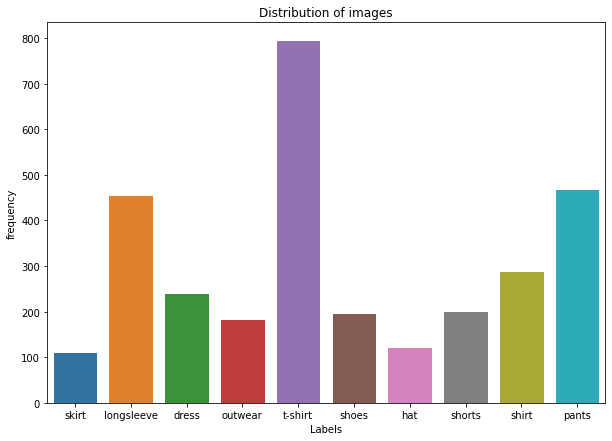

In [ ]:
img = os.listdir("cnn_m/train")
print(len(img))
count_dict = {k : 0 for k in img}
store= 0
img_list = []
#counting the number of images of each category
for index, label in enumerate(img):
    images=os.listdir(os.path.join("cnn_m/train", "{}".format(label)))
    for entry in images:
        img_list.append(os.path.join("cnn_m/train/{}".format(label),entry))
        count_dict[label]+=1
        store= store + 1
df = pd.DataFrame(count_dict, index=[0])
fig, ax = plt.subplots(figsize=(10,7))
sns.set_style('darkgrid')
axs = sns.barplot(data = df, ax=ax)
axs.set_title("Distribution of images")
axs.set(xlabel="Labels", ylabel="frequency")
print("Total number of images:  {} ".format(store))
print("clases are : ", count_dict)

In [ ]:
img=Image.open(img_list[1])
arr = img_to_array(img)
print("Shape of each image in the sample: ",arr.shape)

Shape of each image in the sample:  (533, 400, 3)


In [19]:
train_gen = ImageDataGenerator(preprocessing_function = preprocess_input)
train_ds=train_gen.flow_from_directory(directory="cnn_m/train", target_size=(150,150), batch_size=32, seed=1)
val_gen = ImageDataGenerator(preprocessing_function = preprocess_input)
val_ds=val_gen.flow_from_directory(directory="cnn_m/validation", target_size=(150,150), batch_size=32, seed=1)
test_gen = ImageDataGenerator(preprocessing_function = preprocess_input)
test_ds=test_gen.flow_from_directory(directory="cnn_m/test", target_size=(150,150), batch_size=32, seed=1)
base_model=Xception(weights= 'imagenet', include_top=False, input_shape=(150,150,3))
base_model.trainable = False
inputs=tf.keras.Input(shape=(150,150,3))
base_layer = base_model(inputs, training=False)
vector = tf.keras.layers.GlobalAveragePooling2D()(base_layer)
outputs=Dense(10)(vector)

model = Model(inputs, outputs)
model.summary()
lr=0.01

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.
Found 372 images belonging to 10 classes.
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
xception (Functional)        (None, 5, 5, 2048)        20861480  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                20490     
Total params: 20,881,970
Trainable params: 20,490
Non-trainable params: 20,861,480
_________________________________________________________________


In [21]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
hist = model.fit(train_ds, epochs=5, verbose=1, validation_data=val_ds)

Epoch 1/5
96/96 [==============================] - 16s 142ms/step - loss: 1.6487 - accuracy: 0.5648 - val_loss: 0.8864 - val_accuracy: 0.7713
Epoch 2/5
96/96 [==============================] - 13s 134ms/step - loss: 0.5062 - accuracy: 0.8423 - val_loss: 0.8498 - val_accuracy: 0.7801
Epoch 3/5
96/96 [==============================] - 13s 134ms/step - loss: 0.3495 - accuracy: 0.8834 - val_loss: 1.3764 - val_accuracy: 0.7742
Epoch 4/5
96/96 [==============================] - 13s 133ms/step - loss: 0.3562 - accuracy: 0.8981 - val_loss: 1.0237 - val_accuracy: 0.7830
Epoch 5/5
96/96 [==============================] - 13s 133ms/step - loss: 0.2013 - accuracy: 0.9271 - val_loss: 1.0614 - val_accuracy: 0.7713


The accuracy of the model Xception after 5 epochs:  92.76401400566101


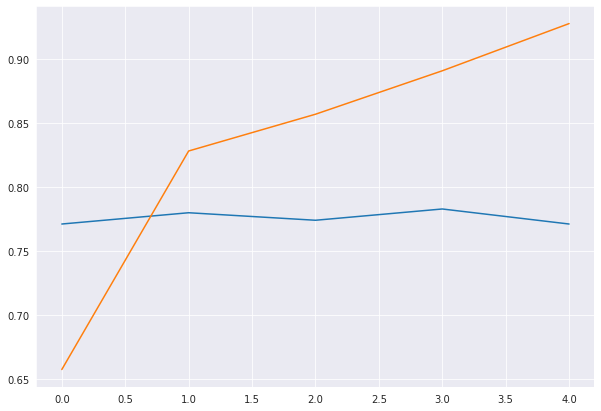

In [22]:
plt.figure(figsize=(10,7))
plt.plot(hist.epoch, hist.history['val_accuracy'])
plt.plot(hist.epoch, hist.history['accuracy'])
acc=hist.history['accuracy']
acc=np.array(acc)
print('The accuracy of the model Xception after 5 epochs: ', np.amax(acc)*100)
model.save('xception_model.h5')

In [23]:
predict= model.evaluate(test_ds)

12/12 [==============================] - 2s 171ms/step - loss: 1.0477 - accuracy: 0.7473
